<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/Project_AI_2_5_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Khai báo thư viện

#1.Thư viện tính toán và hiển thị 
import matplotlib.pyplot as plt
import numpy as np

#2.Thư viện xử lý hình 3 chiều thành dữ liệu dưới dạng số
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical

In [ ]:
folder = '/content/gdrive/MyDrive/AI_Data_Homework_1/Project_2_5_Flowers'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('Tulip '):
    output= 1.0
  if file.startswith('Daisy '):
    output= 2.0
  if file.startswith('Sunflower '):
    output= 3.0
  if file.startswith('Dandelion '):
    output= 4.0
  if file.startswith('Rose '):
    output= 5.0

  photo = load_img(folder + '/' + file, target_size= (180,180))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)

save('/content/gdrive/MyDrive/Data_digital_2/flower_photos.npy', photos)
save('/content/gdrive/MyDrive/Data_digital_2/flower_labels.npy', labels)

(1320, 180, 180, 3) (1320,)


In [ ]:
# Khởi tạo và sử dụng dữ liệu đã tạo
photos = np.load('/content/gdrive/MyDrive/Data_digital_2/flower_photos.npy')
labels = np.load('/content/gdrive/MyDrive/Data_digital_2/flower_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:25], labels[:25]
train_x, train_y = photos[25:], labels[25:]

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy


In [ ]:
# Tạo ra mô hình mạng CNN để train

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [ ]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=64), epochs=40, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

Epoch 1/40
21/21 [==============================] - 24s 491ms/step - loss: 1.6113 - accuracy: 0.2726 - val_loss: 1.7893 - val_accuracy: 0.0000e+00
Epoch 2/40
21/21 [==============================] - 9s 452ms/step - loss: 1.2311 - accuracy: 0.4903 - val_loss: 1.7062 - val_accuracy: 0.0000e+00
Epoch 3/40
21/21 [==============================] - 9s 423ms/step - loss: 1.1499 - accuracy: 0.5166 - val_loss: 1.3953 - val_accuracy: 0.0000e+00
Epoch 4/40
21/21 [==============================] - 10s 464ms/step - loss: 1.0677 - accuracy: 0.5637 - val_loss: 1.2628 - val_accuracy: 0.3200
Epoch 5/40
21/21 [==============================] - 10s 457ms/step - loss: 1.0223 - accuracy: 0.5915 - val_loss: 1.1961 - val_accuracy: 0.6400
Epoch 6/40
21/21 [==============================] - 8s 397ms/step - loss: 1.0061 - accuracy: 0.6116 - val_loss: 0.8492 - val_accuracy: 0.6800
Epoch 7/40
21/21 [==============================] - 11s 509ms/step - loss: 0.9808 - accuracy: 0.6270 - val_loss: 1.2760 - val_accurac

Test loss: 0.7527536153793335
Test accunacy 0.8399999737739563


Text(0.5, 1.0, 'Training & Testing Accuracy')

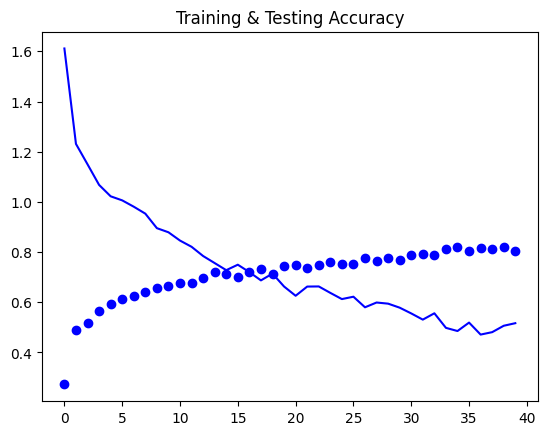

In [ ]:
import matplotlib.pyplot as plt

eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])

accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [ ]:
model.save('/content/gdrive/MyDrive/Data_digital_2/flower.h5')

1/1 [==============================] - 0s 18ms/step
HOA CUC


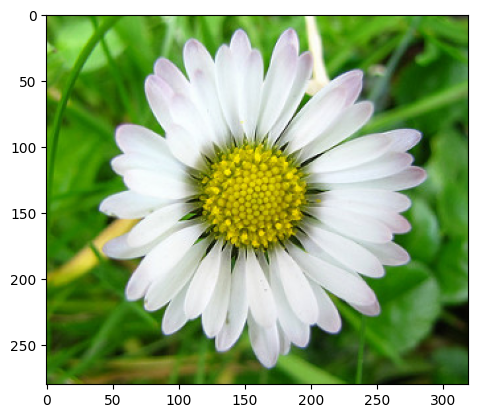

1/1 [==============================] - 0s 20ms/step
HOA BO CONG ANH


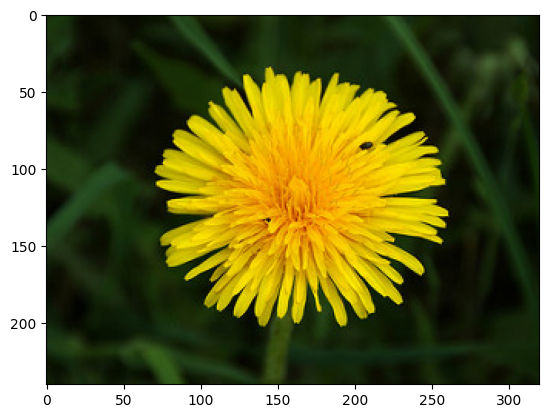

1/1 [==============================] - 0s 23ms/step
HOA HONG


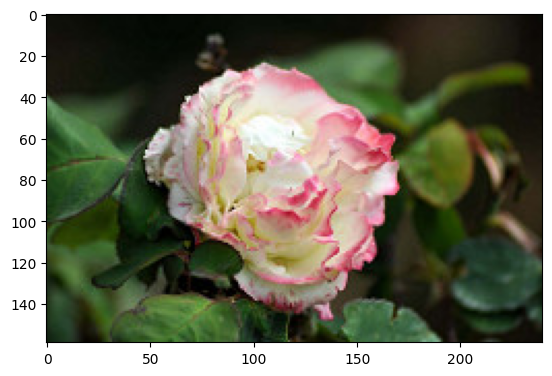

1/1 [==============================] - 0s 50ms/step
HOA HONG


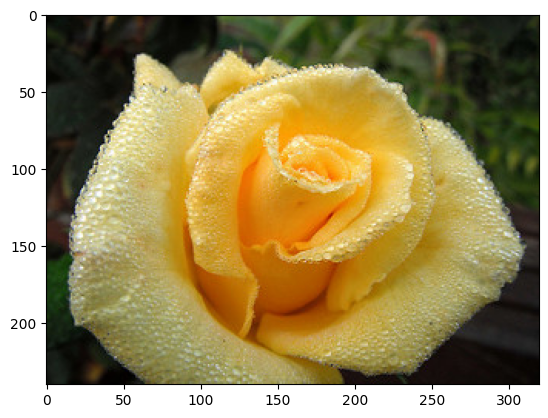

1/1 [==============================] - 0s 34ms/step
HOA HUONG DUONG


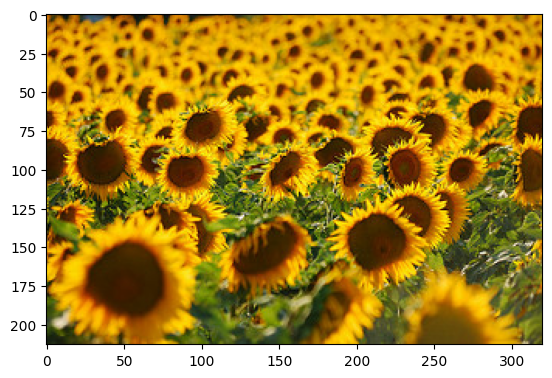

1/1 [==============================] - 0s 31ms/step
HOA HONG


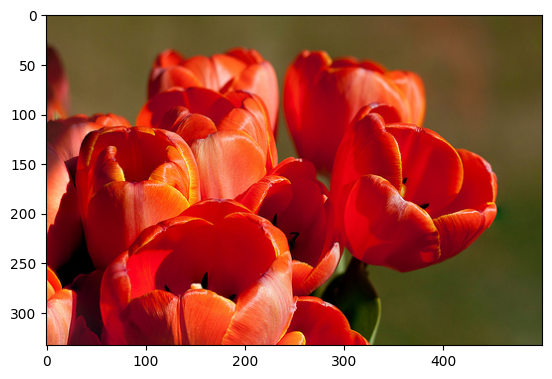

In [ ]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/gdrive/MyDrive/P2'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (180, 180))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=[' ','HOA TULIP','HOA CUC','HOA HUONG DUONG', 'HOA BO CONG ANH', 'HOA HONG']
  print(class_name[result])
  plt.show()